# Final project guidelines

**Note:** Use these guidelines if and only if you are pursuing a **final project of your own design**. For those taking the final exam instead of the project, see the (separate) final exam notebook.

## Guidelines

These guidelines are intended for **undergraduates enrolled in INFO 3350**. If you are a graduate student enrolled in INFO 6350, you're welcome to consult the information below, but you have wider latitude to design and develop your project in line with your research goals.

### The task

Your task is to: identify an interesting problem connected to the humanities or humanistic social sciences that's addressable with the help of computational methods, formulate a hypothesis about it, devise an experiment or experiments to test your hypothesis, present the results of your investigations, and discuss your findings.

These tasks essentially replicate the process of writing an academic paper. You can think of your project as a paper in miniature.

You are free to present each of these tasks as you see fit. You should use narrative text (that is, your own writing in a markdown cell), citations of others' work, numerical results, tables of data, and static and/or interactive visualizations as appropriate. Total length is flexible and depends on the number of people involved in the work, as well as the specific balance you strike between the ambition of your question and the sophistication of your methods. But be aware that numbers never, ever speak for themselves. Quantitative results presented without substantial discussion will not earn high marks. 

Your project should reflect, at minimum, ten **or more** hours of work by each participant, though you will be graded on the quality of your work, not the amount of time it took you to produce it. Most high-quality projects represent twenty or more hours of work by each member.

#### Pick an important and interesting problem!

No amount of technical sophistication will overcome a fundamentally uninteresting problem at the core of your work. You have seen many pieces of successful computational humanities research over the course of the semester. You might use these as a guide to the kinds of problems that interest scholars in a range of humanities disciplines. You may also want to spend some time in the library, reading recent books and articles in the professional literature. **Problem selection and motivation are integral parts of the project.** Do not neglect them.

### Format

You should submit your project as a Jupyter notebook, along with all data necessary to reproduce your analysis. If your dataset is too large to share easily, let us know in advance so that we can find a workaround. If you have a reason to prefer a presentation format other than a notebook, likewise let us know so that we can discuss the options.

Your report should have four basic sections (provided in cells below for ease of reference):

1. **Introduction and hypothesis.** What problem are you working on? Why is it interesting and important? What have other people said about it? What do you expect to find?
2. **Corpus, data, and methods.** What data have you used? Where did it come from? How did you collect it? What are its limitations or omissions? What major methods will you use to analyze it? Why are those methods the appropriate ones?
3. **Results.** What did you find? How did you find it? How should we read your figures? Be sure to include confidence intervals or other measures of statistical significance or uncetainty where appropriate.
4. **Discussion and conclusions.** What does it all mean? Do your results support your hypothesis? Why or why not? What are the limitations of your study and how might those limitations be addressed in future work?

Within each of those sections, you may use as many code and markdown cells as you like. You may, of course, address additional questions or issues not listed above.

All code used in the project should be present in the notebook (except for widely-available libraries that you import), but **be sure that we can read and understand your report in full without rerunning the code**. Be sure, too, to explain what you're doing along the way, both by describing your data and methods and by writing clean, well commented code.

### Grading

This project takes the place of the take-home final exam for the course. It is worth 35% of your overall grade. You will be graded on the quality and ambition of each aspect of the project. No single component is more important than the others.

### Practical details

* The project is due at **noon on Saturday, December 9** via upload to CMS of a single zip file containing your fully executed Jupyter notebook and all associated data.
* You may work alone or in a group of up to three total members.
    * If you work in a group, be sure to list the names of the group members.
    * For groups, create your group on CMS and submit one notebook for the entire group. **Each group should also submit a statement of responsibility** that describes in general terms who performed which parts of the project.
* You may post questions on Ed, but should do so privately (visible to course staff only).
* Interactive visualizations do not always work when embedded in shared notebooks. If you plan to use interactives, you may need to host them elsewhere and link to them.

---

Imports

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import spacy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Table of Contents
1. [Read data](#read_data)
2. [Simple Vectorizer](#simple_vectorizer)
3. [Year Regression](#year_regression)
4. [Lemmas](#lemmas)
5. [High Energy](#high_energy)


## 1. Read data <a name = "read_data"></a>

We read in Taylor Swift song lyrics and spotify data from a csv that adashofdata created and housed on a github repository: https://github.com/adashofdata/taylor_swift_data. We checked all her files and checked the lyrics and song names and confirmed that this data was 1) better than any Kaggle Dataset that we found 2) produced the same results as we would if we were to scrape Spotify for every Taylor Swift song. 

While adashofdata has way more spreadsheets then we needed, such as we ruled out needing Taylor_Swift_Set_List_Data which hosts a set list from her six tours, and Taylor_Swift_Words, which houses a breakdown of her lyrics into words.

We also reviewed what adashofdata had done with the data, which she used to create a blog post: http://adashofdata.com/2023/03/01/a-data-scientist-breaks-down-all-10-taylor-swift-albums-the-extended-version/, a video virtually a summary of her blog post: https://youtu.be/ZNFms8sUbTw, and a few Reddit threads with the same findings: https://www.reddit.com/r/TaylorSwift/comments/11g46c5/all_the_colors_mentioned_in_each_taylor_swift/, https://www.reddit.com/r/TaylorSwift/comments/11f6xa8/taylor_swift_writes_a_song_in_every_key_on/, and https://www.reddit.com/r/TaylorSwift/comments/11mv3sn/taylor_says_she_imagines_writing_her_songs_with_3/. AdashofData's findings did not align with our discussion as below we look at how her song lyrics can assist in the prediction of which Year the song is released and whether we can classify a song as High Energy or not. Adashofdata's findings are indeed interesting and we support you if you wish to understand more about seasonality of Taylor Swift, which Days of the Week she talked about, swear words and more!

**Limitations** of the data include the fact that we decided not to include any songs that Taylor Swift re-recorded: Fearless(Taylor's Version), Red(Taylor's Version), Speak Now (Taylor's Version), etc. This was due to the overlap and the fact that we desired to see if her music has potentially evolved or changed since starting her career and thus re-released songs would have potentially hindered our analysis.

Other pitfalls include our data reviews 133 songs below, but songs that she created for another Artist/TV Shows/etc and lawsuits that occurred that made artists place her name on the writers list were not included. Also overlapping songs where she re-recorded with a featured artist were not included as well to avoid repetition. 

The data was extremely clean and thus if you search up the lyrics for certain lyrics they will not include quotations around words that the author says, but due to cleaning ours does.

In [87]:
print(full_dataframe['Lyrics'][full_dataframe['Song Name'] == "mary's song (oh my my my)"][0])

She said I was seven and you were nine I looked at you like the stars that shined In the sky, the pretty lights And our daddies used to joke about the two of us Growing up and falling in love And our mamas smiled and rolled their eyes And said, "Oh, my, my, my"  Take me back to the house in the backyard tree Said you'd beat me up, you were bigger than me You never did, you never did Take me back when our world was one block wide I dared you to kiss me and ran when you tried Just two kids, you and I Oh, my, my, my, my Well, I was sixteen when suddenly I wasn't that little girl you used to see But your eyes still shined like pretty lights And our daddies used to joke about the two of us They never believed we'd really fall in love And our mamas smiled and rolled their eyes And said, "Oh, my, my, my"  Take me back to the creek beds we turned up 2 a.m. riding in your truck And all I need is you next to me Take me back to the time we had our very first fight The slamming of doors 'stead of 

In [72]:
spotify_csv = pd.read_csv("taylor_swift_data-main/Taylor_Swift_Spotify/taylor_swift_spotify_data.csv", index_col = "Playlist ID")
spotify_csv.head(8)

,URI,Album,Song Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
Playlist ID,,,,,,,,,,,,,,,,
1.0,0Om9WAB5RS09L80DyOfTNa,Taylor Swift,Tim McGraw,0.580,0.491,0.0,-6.462,1.0,0.0251,0.57500,0.0,0.1210,0.425,76.009,232107.0,4.0
2.0,32mVHdy0bi1XKgr0ajsBlG,Taylor Swift,Picture To Burn,0.658,0.877,7.0,-2.098,1.0,0.0323,0.17300,0.0,0.0962,0.821,105.586,173067.0,4.0
3.0,7zMcNqs55Mxer82bvZFkpg,Taylor Swift,Teardrops On My Guitar - Radio Single Remix,0.621,0.417,10.0,-6.941,1.0,0.0231,0.28800,0.0,0.1190,0.289,99.953,203040.0,4.0
4.0,73OX8GdpOeGzKC6OvGSbsv,Taylor Swift,A Place in this World,0.576,0.777,9.0,-2.881,1.0,0.0324,0.05100,0.0,0.3200,0.428,115.028,199200.0,4.0
5.0,7an1exwMnfYRcdVQm0yDev,Taylor Swift,Cold As You,0.418,0.482,5.0,-5.769,1.0,0.0266,0.21700,0.0,0.1230,0.261,175.558,239013.0,4.0
6.0,2QA3IixpRcKyOdG7XDzRgv,Taylor Swift,The Outside,0.589,0.805,5.0,-4.055,1.0,0.0293,0.00491,0.0,0.2400,0.591,112.982,207107.0,4.0
7.0,6K0CJLVXqbGMeJSmJ4ENKK,Taylor Swift,Tied Together with a Smile,0.479,0.578,2.0,-4.963,1.0,0.0294,0.52500,0.0,0.0841,0.192,146.165,248107.0,4.0
8.0,2ZoOmCSgj0ypVAmGd1ve4y,Taylor Swift,Stay Beautiful,0.594,0.629,8.0,-4.919,1.0,0.0246,0.08680,0.0,0.1370,0.504,131.597,236053.0,4.0


In [73]:
spotify_csv['Album'].unique()

array(['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989',
       'reputation', 'Lover', 'folklore', 'evermore', 'Midnights'],
      dtype=object)

In [74]:
spotify_csv.columns

Index(['URI', 'Album', 'Song Name', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Time Signature'],
      dtype='object')

In [75]:
song_lyrics_csv = pd.read_csv("taylor_swift_data-main/Taylor_Swift_Genius/taylor_swift_genius_data.csv", index_col = "index")
song_lyrics_csv.head(8)

,Album,Song Name,Lyrics
index,,,
0,Taylor Swift,Mary's Song (Oh My My My),She said I was seven and you were nine I looke...
1,Taylor Swift,A Perfectly Good Heart,Why would you wanna break A perfectly good hea...
2,Taylor Swift,Tim McGraw,He said the way my blue eyes shined Put those ...
3,Taylor Swift,Teardrops On My Guitar,Drew looks at me I fake a smile so he won't se...
4,Taylor Swift,Cold as You,You have a way of coming easily to me And when...
5,Taylor Swift,The Outside,I didn't know what I would find When I went lo...
6,Taylor Swift,Should've Said No,It's strange to think the songs we used to sin...
7,Taylor Swift,A Place In This World,"I don't know what I want, so don't ask me 'Cau..."


In [76]:
song_lyrics_csv['Album'].unique()

array(['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989',
       'Reputation', 'Lover', 'folklore', 'evermore', 'Midnights'],
      dtype=object)

In [77]:
# song_lyrics_csv[song_lyrics_csv['Album']=='taylor swift']['Lyrics'][1]

In [78]:
song_lyrics_csv['Album'].unique()

array(['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989',
       'Reputation', 'Lover', 'folklore', 'evermore', 'Midnights'],
      dtype=object)

In [79]:
spotify_csv['Album'].unique()

array(['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989',
       'reputation', 'Lover', 'folklore', 'evermore', 'Midnights'],
      dtype=object)

In [80]:
spotify_csv.head()
spotify_csv['Song Name']=spotify_csv['Song Name'].apply(lambda x: x.strip().lower().replace('\u200b', ''))
spotify_csv['Album']=spotify_csv['Album'].apply(lambda x: x.strip().lower())

song_lyrics_csv['Song Name']=song_lyrics_csv['Song Name'].apply(lambda x: x.strip().lower().replace('\u200b', ''))
song_lyrics_csv['Album']=song_lyrics_csv['Album'].apply(lambda x: x.strip().lower())
song_lyrics_csv.head()


full_dataframe = song_lyrics_csv.merge(spotify_csv, how='inner', on=['Song Name', 'Album'])
full_dataframe['Album'].unique()

# display(song_lyrics_csv[song_lyrics_csv['new_a']=='evermore']['new_sn'].unique(),
# spotify_csv[spotify_csv['new_a']=='evermore']['new_sn'].unique())

array(['taylor swift', 'fearless', 'speak now', 'red', '1989',
       'reputation', 'lover', 'folklore', 'evermore', 'midnights'],
      dtype=object)

In [81]:
full_dataframe['Album'].unique()

array(['taylor swift', 'fearless', 'speak now', 'red', '1989',
       'reputation', 'lover', 'folklore', 'evermore', 'midnights'],
      dtype=object)

In [82]:
values = []
for i in range(0, len(full_dataframe['Lyrics'])):
    values.append(len(full_dataframe['Lyrics'][i]))
full_dataframe['Lyrics Length'] = values

In [83]:
full_dataframe.head(4)

,Album,Song Name,Lyrics,URI,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Lyrics Length
0,taylor swift,mary's song (oh my my my),She said I was seven and you were nine I looke...,2QrQCMel6v2JiLxqrg4p2O,0.403,0.627,2.0,-5.280,1.0,0.0292,0.01770,0.0,0.182,0.374,74.900,213080.0,4.0,1602
1,taylor swift,a perfectly good heart,Why would you wanna break A perfectly good hea...,1spLfUJxtyVyiKKTegQ2r4,0.483,0.751,4.0,-5.726,1.0,0.0365,0.00349,0.0,0.128,0.268,156.092,220147.0,4.0,1214
2,taylor swift,tim mcgraw,He said the way my blue eyes shined Put those ...,0Om9WAB5RS09L80DyOfTNa,0.580,0.491,0.0,-6.462,1.0,0.0251,0.57500,0.0,0.121,0.425,76.009,232107.0,4.0,1801
3,taylor swift,cold as you,You have a way of coming easily to me And when...,7an1exwMnfYRcdVQm0yDev,0.418,0.482,5.0,-5.769,1.0,0.0266,0.21700,0.0,0.123,0.261,175.558,239013.0,4.0,1225


In [14]:
full_dataframe.shape

(133, 18)

In [15]:
full_dataframe = full_dataframe.drop(columns = ['URI'])

In [16]:
full_dataframe.head(5)

,Album,Song Name,Lyrics,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Lyrics Length
0,taylor swift,mary's song (oh my my my),She said I was seven and you were nine I looke...,0.403,0.627,2.0,-5.280,1.0,0.0292,0.01770,0.0,0.182,0.374,74.900,213080.0,4.0,1602
1,taylor swift,a perfectly good heart,Why would you wanna break A perfectly good hea...,0.483,0.751,4.0,-5.726,1.0,0.0365,0.00349,0.0,0.128,0.268,156.092,220147.0,4.0,1214
2,taylor swift,tim mcgraw,He said the way my blue eyes shined Put those ...,0.580,0.491,0.0,-6.462,1.0,0.0251,0.57500,0.0,0.121,0.425,76.009,232107.0,4.0,1801
3,taylor swift,cold as you,You have a way of coming easily to me And when...,0.418,0.482,5.0,-5.769,1.0,0.0266,0.21700,0.0,0.123,0.261,175.558,239013.0,4.0,1225
4,taylor swift,the outside,I didn't know what I would find When I went lo...,0.589,0.805,5.0,-4.055,1.0,0.0293,0.00491,0.0,0.240,0.591,112.982,207107.0,4.0,1114


## 2. Simple Vectorizer <a name = "simple_vectorizer"></a>
Wanting to understand more about Taylor Swift's specific lyrics and understand if there were any words that were repeated in the lyrics and why. I created a vectorizer that produces a feature matrix of normalized token counts for the corpus.

This was necessary to take in the lyrics from the Taylor Swift songs and produce comparable results of: keeping stop words and after removing stopwords. The TfidfVectorizer's ability to collect raw documents and utilize term frequencies, the number of times a given term appears in document/total words in document, by. the inverse document frequency, the log(Total Number of Documents/Number of Documents with Term) makes this vectorizer the best to use for our dataset.

To take in all the lyrics from the Taylor Swift songs I created a list that extracts the Lyrics from the dataframe. Making it easy to use and most importantly fits the needs of the vectorizer that we are utilizing.

In [17]:
all_lyrics = full_dataframe['Lyrics'].values.tolist()

In an effort to compare with and without the english stopwords I first began with **including the english stopwords** to find the top features.

In [18]:
vectorizer = TfidfVectorizer(min_df = 0.5, use_idf = False)
X = vectorizer.fit_transform(all_lyrics)

print("Feature matrix of normalized token counts shape:", (X.toarray().shape))

Feature matrix of normalized token counts shape: (133, 39)


In [19]:
standardized_data = StandardScaler().fit_transform(X.toarray())

I printed out all the top features ending with 39 of them.

In [20]:
print("Resulting feature matrix shape:", standardized_data.shape)
print("Mean value:", standardized_data.mean())
print("Feature names:", vectorizer.get_feature_names_out())

without_stopwords = vectorizer.get_feature_names_out()

Resulting feature matrix shape: (133, 39)
Mean value: -1.8493015100754488e-17
Feature names: ['all' 'also' 'and' 'be' 'but' 'can' 'cause' 'don' 'for' 'in' 'is' 'it'
 'just' 'know' 'like' 'me' 'might' 'my' 'never' 'now' 'of' 'oh' 'on' 'out'
 're' 'so' 'that' 'the' 'this' 'time' 'to' 'up' 'was' 'we' 'what' 'when'
 'with' 'you' 'your']


The features that we extracted do not really surprise me. As a group of avid Taylor Swift listeners we have heard these sorts of filler words like `all`, `also`, `and`, `be`, `but`, `can`, `is`, `it`, and more thousands of times. When looking through Shayna Kothari’s Taylor Swift Lyric Search app we notice the word `all` is used 708 times in 171 songs with songs like `All Too Well`, `Come Back...Be Here`, `Everything Has Changed`, `Forever Winter`, `ME!`, and many more.

Words like `never` and `time` though not surprising to the average Taylor Swift listener as songs like `We are Never Ever Getting Back Together` and `Never Grow Up` float through your mind, are definitely distinct from normal conversation.

**Removing the Stopword** include:

In [21]:
vectorizer = TfidfVectorizer(min_df = 0.5, use_idf = False, stop_words = 'english')
X = vectorizer.fit_transform(all_lyrics)

print("Feature matrix of normalized token counts shape:", (X.toarray().shape))

Feature matrix of normalized token counts shape: (133, 7)


In [22]:
standardized_data = StandardScaler().fit_transform(X.toarray())

In [23]:
print("Resulting feature matrix shape:", standardized_data.shape)
print("Mean value:", standardized_data.mean())
print("Feature names:", vectorizer.get_feature_names_out())

with_stopwords = vectorizer.get_feature_names_out()

Resulting feature matrix shape: (133, 7)
Mean value: 3.5298175648662336e-17
Feature names: ['cause' 'don' 'just' 'know' 'like' 'oh' 'time']


These feature words are not extremely surprising as well as `oh`, `time`, and `like` seem extremely common in lyrical dat. As songs like `time` and `oh` and extremely common in songs like `The Last Time` `The Very First Night`, `Mary's Song (Oh My My My)`, and `Back To December`.

In [24]:
values = np.concatenate((without_stopwords, with_stopwords))

In [25]:
counter = Counter(values)
over_one_occurance = []
all_words = []
unique_occurance = []
for i in counter.keys():
    if(counter[i] > 1):
      over_one_occurance.append(i)
    elif(counter[i] <= 1):
     unique_occurance.append(i)
    all_words.append(i)

In [26]:
print("Words that occur in both before removing stop words and having stop words:", over_one_occurance)

Words that occur in both before removing stop words and having stop words: ['cause', 'don', 'just', 'know', 'like', 'oh', 'time']


In [27]:
print("Words that occur only in having stop words or only in removing stop words:", unique_occurance)

Words that occur only in having stop words or only in removing stop words: ['all', 'also', 'and', 'be', 'but', 'can', 'for', 'in', 'is', 'it', 'me', 'might', 'my', 'never', 'now', 'of', 'on', 'out', 're', 'so', 'that', 'the', 'this', 'to', 'up', 'was', 'we', 'what', 'when', 'with', 'you', 'your']


In [28]:
print("All Words:", all_words)

All Words: ['all', 'also', 'and', 'be', 'but', 'can', 'cause', 'don', 'for', 'in', 'is', 'it', 'just', 'know', 'like', 'me', 'might', 'my', 'never', 'now', 'of', 'oh', 'on', 'out', 're', 'so', 'that', 'the', 'this', 'time', 'to', 'up', 'was', 'we', 'what', 'when', 'with', 'you', 'your']


## 3. Simple Linear Regression on Year <a name = "year_regression"></a>
Interested in exploring whether through lyrics we can predict the year Taylor Swift's song was released and see whether there were any noticible patterns I utilized the whole dataset as a training set and also a train test split of 70/30 to see how well my model does at taking in lyrics and predicting the year.

- [Predicting using all the Data](#predicting_will_all_data)
- [Train Test Split Y Years](#train_test_split)

Showcasing the entire full_dataframe's Album to map the year to the Album and begin predicting through Linear Regression model based on lyrics which year her song is released in.

In [29]:
full_dataframe['Album'].unique()
#https://www.radiotimes.com/audio/taylor-swift-albums-in-order/

array(['taylor swift', 'fearless', 'speak now', 'red', '1989',
       'reputation', 'lover', 'folklore', 'evermore', 'midnights'],
      dtype=object)

Mapping the songs year of released based on when the album was released. We have a total of 10 albums represented–which is all of Taylor Swift's **Studio Albums**. As stated before we did not include her four re-recordings, any live albums, EPs, Compilations, and Box sets, which amount to an additional 38.

In [30]:
matching_album_name_to_year = {
    'taylor swift': 2006,
    'fearless': 2008,
    'speak now': 2010,
    'red': 2012,
    '1989': 2014,
    'reputation': 2017,
    'lover': 2019,
    'folklore': 2020,
    'evermore': 2020,
    'midnights': 2022,
}

In [31]:
full_dataframe['Year'] = full_dataframe['Album'].map(matching_album_name_to_year)

In [32]:
full_dataframe.head()

,Album,Song Name,Lyrics,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Lyrics Length,Year
0,taylor swift,mary's song (oh my my my),She said I was seven and you were nine I looke...,0.403,0.627,2.0,-5.280,1.0,0.0292,0.01770,0.0,0.182,0.374,74.900,213080.0,4.0,1602,2006
1,taylor swift,a perfectly good heart,Why would you wanna break A perfectly good hea...,0.483,0.751,4.0,-5.726,1.0,0.0365,0.00349,0.0,0.128,0.268,156.092,220147.0,4.0,1214,2006
2,taylor swift,tim mcgraw,He said the way my blue eyes shined Put those ...,0.580,0.491,0.0,-6.462,1.0,0.0251,0.57500,0.0,0.121,0.425,76.009,232107.0,4.0,1801,2006
3,taylor swift,cold as you,You have a way of coming easily to me And when...,0.418,0.482,5.0,-5.769,1.0,0.0266,0.21700,0.0,0.123,0.261,175.558,239013.0,4.0,1225,2006
4,taylor swift,the outside,I didn't know what I would find When I went lo...,0.589,0.805,5.0,-4.055,1.0,0.0293,0.00491,0.0,0.240,0.591,112.982,207107.0,4.0,1114,2006


In [33]:
all_years = full_dataframe['Year'].values.tolist()

### Predicting using all the Data<a name = "predicting_will_all_data"></a>

I trained my regressor on the scaled input feature matrix and the years based on the year the song/album was released. I then use the fitted regressor to predict new y values given the same input: scaled input feature matrix. While this does promote overfitting because of the dataset and the fact it is based on time this was why I wanted to run on the whole dataset.
Below I showcase the predicted album dates as a function of the true album dates and include the line of best fit with the confidence region. I do want to point out the residual plot through random does display a bit of a pattern, which can point out as a concern, and after transforming using squared and differrent powers the residual plots do remain similar.

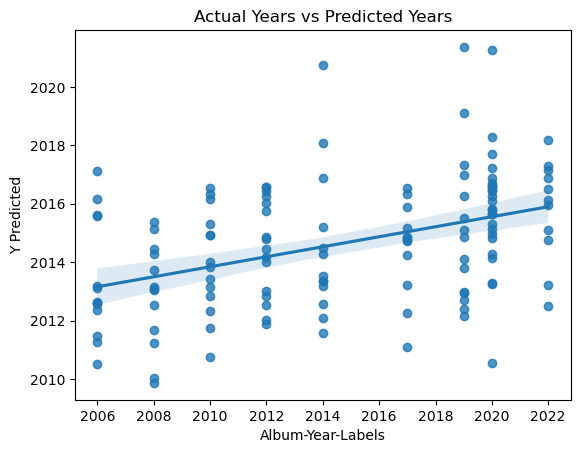

In [34]:
# code here
reg = LinearRegression().fit(standardized_data, all_years)
y_hat = reg.predict(standardized_data)

# use https://seaborn.pydata.org/generated/seaborn.regplot.html
x = sns.regplot(x=all_years , y = y_hat);
x.set(xlabel = "Album-Year-Labels", ylabel = "Y Predicted", title = "Actual Years vs Predicted Years");

The confidence region is relatively narrow, which is suggesting that the model is confident in its predictions. It is especially narrow in the 2015-ish region showcasing more confidence in that specific area of year. One noticable distress is the fact that there is quite a bit of scatter around the line of best fit suggesting that there is some noise in the data or the model is not able to perfectly capture all the factors that influence an album release date, in the future when there is more data available we could potentially look at Taylor Swift's mood, fashion, tour, etc. to predict the year better.

Overall, the model is able to predict album release dates with some accuracy and good confidence, but there are rooms for improvement, below we will explore how utilizing tags and lemmatizers could potentially assist!

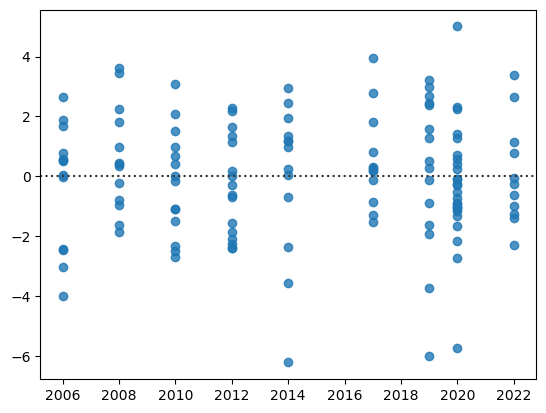

In [35]:
sns.residplot(x = all_years, y = (all_years - y_hat));

Some potential pattern, but mostly random so showcases that we could try transforming the data, but as I've tried with powers the model does not change dramatically.

In [36]:
def compare_scores(feature_matrix, all_years):
    # fit Linear Regression object
    reg = LinearRegression().fit(feature_matrix, all_years)
    print("Naive R^2:", reg.score(feature_matrix, all_years))
    r2 = np.mean(cross_val_score(reg, feature_matrix, all_years, scoring='r2'))
    print("Mean proper, non-overfitted, cross-validated R^2 (topics):", round(np.mean(cross_val_score(reg, feature_matrix, all_years, scoring='r2')),3))

compare_scores(vectorizer.fit_transform(all_lyrics), all_years)

Naive R^2: 0.17122171999312596
Mean proper, non-overfitted, cross-validated R^2 (topics): -47.472


The Naive $R^2$ measures the proportion of the variance in the dependent variable, the $\hat{y}$ which is the predicted values, that is predictable from the independent variable, the features – Taylor Swift's lyrics. Thus our 0.1712 indicates that roughly 17.12% of the variance in the year the song is released is explained by the song lyrics. Another way to say this is that the model captures 17.12% of the variability in your data. Keep in mind this is a low $R^2$ value, suggesting that the model may not be explaining a significant portion of the variance.

As pointed out above we are fitting our model on all our data, aka all our data is training data and none are test data, thus we will be prone to overfitting. This is definitely reflected in our mean proper, non-overfitted, cross-validated $R^2$ (topics) that came out to be -47.472. The value of -47.472 suggests that, on average, my model is performing poorly when evaluated on different subsets of the data. This showcases that our model is not good for the data, which indicates that this model is not capturing the underlying patterns in the data and is probably overfitting.

### Train Test Split Y years <a name = "train_test_split"></a>

I trained my regressor on the scaled input feature matrix and the years based on the year the song/album was released. This time I did a train test split of 70/30 to see if we can have a better mean proper, non-overfitted, cross-validated $R^2$ that will avoid overfitting and have a higher $R^2$. I then use the fitted regressor to predict new y values given the same input: scaled input feature matrix. 
Below I showcase the predicted album dates as a function of the true album dates and include the line of best fit with the confidence region. I do want to point out the residual plot is random.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(all_lyrics, all_years, test_size=0.3, stratify = all_years, random_state=42)

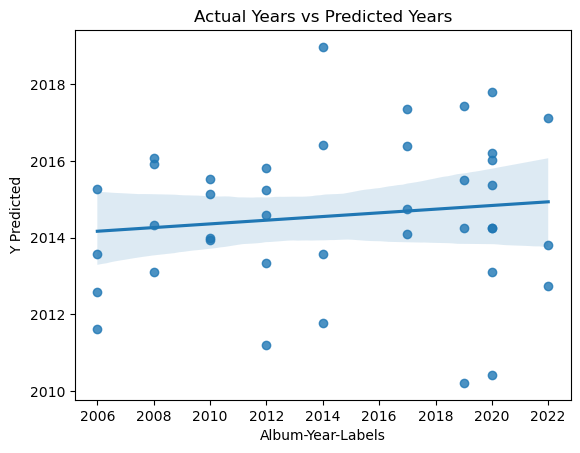

In [38]:
X_train_fitted = vectorizer.fit_transform(X_train)
X_transform_test = vectorizer.transform(X_test)


#X_test
# code here
reg = LinearRegression().fit(X_train_fitted, y_train)
y_hat = reg.predict(X_transform_test)

# use https://seaborn.pydata.org/generated/seaborn.regplot.html
x = sns.regplot(x=y_test , y = y_hat);
x.set(xlabel = "Album-Year-Labels", ylabel = "Y Predicted", title = "Actual Years vs Predicted Years");


The confidence region is relatively wider, especially compared to the confidence interval above. There is more confidence in year 2013, which suggests that the model is more confident around this time period. Like when we ran on the entire dataset the model showcases a large bit of scatter around the line of best fit potentailly suggesting another model that could capture more factors to predict the year. We also want to recommend the same thing as above, which is in the future when there is more data available we could potentially look at Taylor Swift's mood, fashion, tour, etc. to predict the year better.

Overall, the model is able to predict album release dates with some accuracy and okay confidence, but there are rooms for improvement, below we will explore how utilizing tags and lemmatizers could potentially assist!

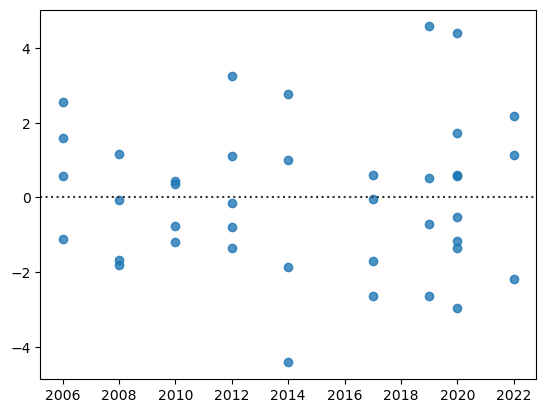

In [39]:
sns.residplot(x = y_test, y = (y_test - y_hat));

## 4. Lemmas <a name = "lemmas"></a>

This function, `lemmatizer`, takes a lyric of each song in the Taylor Swift album and a spaCy NLP object (the en_core_web_sm - small version of the spaCy NLP object) as input. It processes the document with spaCy, iterates through the tokens, and appends the lemmatized form of each non-punctuation and non-whitespace token to a list. The result is a list of lemmatized tokens.

Using the resulting lemmatized tokens we scale the resulting features. And then using compare_scores function we fit a linear regressor on the scaled lemma features and report both the "naïve" and the cross-validated scores.

**Hypothesis**: Whether lemmatized tokens and utilizing en_core_web_sm could model our Taylor Swift Lyrics to year of song release better.

The benefits of using lemmatization include improved text analysis, potential increase of accuracy in the model, reduction of data sparsity, improved understanding of the text and standardization of the text data. 
Lemmatization reduces words to their base form helping the model identify similarities and relationships between the words. Though our dataset is 133 rows (133 songs) lemmatization can potentially help simplify the vocabulary and remove unnecessary variations–though personally I think our analysis in BERT later highlights how Taylor Swift's songs are very similar and thus lemmatization may have little benefit in this aspect as it would normally have. By reducing data sparsity Lemmatization can help the model learn effective representation of the text. Lemmatization brings all words to a common form ensuring all words are represented consistently, potentially aiding our model.

Here we utilize en_core_web_sm only because while it is a relatively small model compared to other spaCy models like en_core_web_md and en_core_web_lg it is ideal for its quickness, good accuracy, general domain training, size, and especially since we are utilizing a relatively small dataset. I also tried utilizing en_core_web_lg and it does not produce largely different results.

In [40]:
# code here
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

def lemmatizer(doc, nlp = nlp):
    
    tokenize_values = []
    
    doc = nlp(doc)
    
    for token in doc:
        # remove punctuation and any "pure" whitespace tokens
        if not token.is_punct and not token.is_space:
            tokenize_values.append(token.lemma_)
    return tokenize_values

In [41]:
vectorizer_add_lemmatizer = TfidfVectorizer(token_pattern = None, min_df = 2, use_idf = True, max_features = 12, tokenizer = lemmatizer)

The resulting feature matrix (X_lemma) is then standardized using the StandardScaler. 

In [42]:
X_lemma = vectorizer_add_lemmatizer.fit_transform(all_lyrics)

standardized_data_lemma = StandardScaler().fit_transform(X_lemma.toarray())

compare_scores(standardized_data_lemma, all_years)

Naive R^2: 0.2763729432896679
Mean proper, non-overfitted, cross-validated R^2 (topics): -53.587


The Naive $R^2$ measures the proportion of the variance in the dependent variable, the $\hat{y}$ which is the predicted values, that is predictable from the independent variable, the features – Taylor Swift's lyrics. Thus our 0.2763 indicates that roughly 27.63% of the variance in the year the song is released is explained by the song lyrics. Another way to say this is that the model captures 27.63% of the variability in your data. Keep in mind this is a low $R^2$ value, suggesting that the model may not be explaining a significant portion of the variance. This is significantly better than our linear regression!

As pointed out above we are fitting our model on all our data, aka all our data is training data and none are test data, thus we will be prone to overfitting. This is definitely reflected in our mean proper, non-overfitted, cross-validated $R^2$ (topics) that came out to be -53.587. The value of -53.587 suggests that, on average, my model is performing poorly when evaluated on different subsets of the data. This showcases that our model is not good for the data, which indicates that this model is not capturing the underlying patterns in the data and is probably overfitting.

### Entities and POS tags

To discover more about the text–Taylor Swift song lyrics–we utilize spaCy a free open-source library for advanced Natural Language Processing in Python. spaCy is used to build information extraction systems, which below I utilize its Part-of-speech (PS) Tagging which assigns word types to tokens. I specifically utilize adjectives, pronouns, prepositions, conjuctions, adverbs, nouns, numbers, etc. I also use Named Entities which is a "real-world object" that is assigned a name and spaCy can recognize these various types of named entities in a document. The named entities that I use are Person, Money, and Time. I specially chose these for Taylor Swift's lyrics as looking through all her albums she has mentions of all these tags. For example in `The Lucky One`, `Blank Space`, and `Anti-Hero` she explains how money has changed or caused people to take an action, in 139 songs Taylor Swift mentions `he`, for example, in `Begin Again` she sings 'He didn't like it when I wore high heels' and in `Better Man` she has many mentions of `he` and `they` not believing in her. Her song `22` is an ode to her turning 22 and has many mentions of `time` and many of her songs mention how time is fleeting or when someone calls. 

I also calculate and showcase the naïve and a cross-validated $R^2$ value for the linear regression prediction of date of the song release from these features.

**Hypothesis**: In an effort to compare whether specific tagging techniques could assist in the creation of a model and if it could produce better results then pushing all the song lyrics of the song in.

In [96]:
valid_ent = ['PERSON', 'MONEY', 'TIME']
valid_pos = ['ADJ', 'ADV', 'AUX', 'CCONJ', 'DET', 'NOUN', 'PRON', 'PROPN', 'VERB', 'NUM']

# Load spaCy model
nlp = spacy.load('en_core_web_sm')
    
tokenize_values = []
    
value = 0
input_array = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for doc in all_lyrics:
    dictionary_saved = {'PERSON': 0, 'MONEY': 0, 'TIME': 0, 'ADJ': 0, 'ADV': 0, 'AUX': 0, 'CCONJ': 0, 'DET': 0, 'NOUN': 0, 
                   'PRON': 0, 'PROPN': 0, 'VERB': 0, 'NUM':0}
    doc = nlp(doc)
    # Entities
    for ent in doc.ents:
        if(ent.label_ in valid_ent):
            value = value + 1
            dictionary_saved[ent.label_] = dictionary_saved.get(ent.label_) + 1
    for token in doc:
        if(token.pos_ in valid_pos):
            value = value + 1
            dictionary_saved[token.pos_] = dictionary_saved.get(token.pos_) + 1
    new_row = []
    for i in dictionary_saved.values():
        new_row.append(i)
        
    input_array=np.vstack([input_array, new_row])
input_array = np.delete(input_array, 0, 0)
print("Shape of the matrix:", input_array.shape)

standardized_count_of_feature_matrix = StandardScaler().fit_transform(input_array)

Shape of the matrix: (133, 13)


Because we use 13 different tags and have 133 songs we produce a matrix of 133 by 13.

In [97]:
compare_scores(standardized_count_of_feature_matrix, all_years)

Naive R^2: 0.2476167107293834
Mean proper, non-overfitted, cross-validated R^2 (topics): -52.3


The Naive $R^2$ measures the proportion of the variance in the dependent variable, the $\hat{y}$ which is the predicted values, that is predictable from the independent variable, the features – thirteen tags from Taylor Swift's lyrics. Thus our 0.2476 indicates that roughly 24.76% of the variance in the year the song is released is explained by the thirteen tags. Another way to say this is that the model captures 24.76% of the variability in your data. Keep in mind this is a low $R^2$ value, suggesting that the model may not be explaining a significant portion of the variance.

As pointed out above we are fitting our model on all our data, aka all our data is training data and none are test data, thus we will be prone to overfitting. This is definitely reflected in our mean proper, non-overfitted, cross-validated $R^2$ (topics) that came out to be -52.3. The value of -52.3 suggests that, on average, my model is performing poorly when evaluated on different subsets of the data. This showcases that our model is not good for the data, which indicates that this model is not capturing the underlying patterns in the data and is probably overfitting.

In [98]:
# code here
combined_scaled_lemma_and_scaled_entity = np.concatenate((standardized_data_lemma, standardized_count_of_feature_matrix), axis=1)
print("Shape of resulting combined matrix:", combined_scaled_lemma_and_scaled_entity.shape)
compare_scores(combined_scaled_lemma_and_scaled_entity, all_years)

Shape of resulting combined matrix: (133, 25)
Naive R^2: 0.39205423370877446
Mean proper, non-overfitted, cross-validated R^2 (topics): -51.864


The Naive $R^2$ measures the proportion of the variance in the dependent variable, the $\hat{y}$ which is the predicted values, that is predictable from the independent variable, the features – thirteen tags from Taylor Swift's lyrics. Thus our 0.3920 indicates that roughly 39.20% of the variance in the year the song is released is explained by the thirteen tags. Another way to say this is that the model captures 39.20% of the variability in your data. Keep in mind this is a low $R^2$ value, suggesting that the model may not be explaining a significant portion of the variance. But it is definitely an improvement from our earlier lemmatozatopm that did not include standardized_data_lemma and a much larger improvement from linear regression.

As pointed out above we are fitting our model on all our data, aka all our data is training data and none are test data, thus we will be prone to overfitting. This is definitely reflected in our mean proper, non-overfitted, cross-validated $R^2$ (topics) that came out to be -51.864. The value of -51.864 suggests that, on average, my model is performing poorly when evaluated on different subsets of the data. This showcases that our model is not good for the data, which indicates that this model is not capturing the underlying patterns in the data and is probably overfitting.

In [99]:
full_set_of_features = StandardScaler(with_mean = False).fit_transform(X_lemma.toarray())

In [100]:
all_years_labels_array = np.array(all_years)

# selected the 10 most informative features
selector = SelectKBest(mutual_info_regression, k=10)
best_twenty_features_selected = selector.fit_transform(full_set_of_features, y = all_years_labels_array)
print("Shape of the resulting feature matrix:", best_twenty_features_selected.shape)

# compare_scores for the selected features
compare_scores(best_twenty_features_selected, all_years_labels_array)

Shape of the resulting feature matrix: (133, 10)
Naive R^2: 0.2730082753731685
Mean proper, non-overfitted, cross-validated R^2 (topics): -51.814


Utilizing KBest to select the top ten most informative features and see whether this will improve or the r-squared will increase. As we see there is virtually no change in our mean proper, non-overfitted, cross-validated $R^2$ as it improves slightly. And the naive $R^2$ lowers.

## 5. Testing if the song is High Energy or Not <a name = "high_energy"></a>
- Danceability: "how suitable a track is for dancing based on a combination of musical elements including temp, rhthm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable"
- Energy: perceptual measure of intensity and activity. Energetic tracks are fast, loud, and noisy.
- Instrumentalness: track contains no vocals - "ohh" and "ahh" sounds are treated as instrumental in this context and rap or spoken word tracks are clearly "vocal." The close instrumentalness is to 1 greater likelihood track contains no vocal content.
- Key: key the track is in. (0 = C, 1 = C#/Db, 2 = D...) **removed**
- Liveness: presence of an auddience in the recording. Higher represents if the track is live.
- Loudness: overall loudness of a track. Quality of sound that is the primary psychological correlate of physical strength (amplitude)
- Mode: modality (major or minor) of a track.
- Speechiness: presense of spoken words in track. More exclusively speech-like the recording the close to 1. **removed**
- Tempo: Overall tempo of a track in beats per minute.
- Valence: 0.0 to 1.0 musical positiveness conveyed by a track.

I felt that key and speechiness provided no benefits as the key was not a portion that affected the music's high_energy and was hard to sum up as the attributing key was not moved to different levels. I also avoided speechiness as all were lyrical songs and not spoken audio books or spoech-like. I did keep mode as I thought it was better in suggesting keys as it distinguished between major and minors, which there has been some research that major are used in popular music and the two catchiest keys - C major and G major - are both majors.

In an effort to understand if we could use Logistic Regression and take in song lyrics to predict whether the song is high energy based on the remaining features listed above. To ensure equal stance in all the features I made the range for all features be 0 to 1.

In [107]:
full_dataframe.columns

Index(['Album', 'Song Name', 'Lyrics', 'URI', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Time Signature',
       'Lyrics Length'],
      dtype='object')

In [108]:
array = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness','Liveness', 'Valence', 'Tempo']
copy = full_dataframe.copy()
for i in range(0, len(array)):
    copy[array[i]] = (full_dataframe[array[i]] - full_dataframe[array[i]].min()) / (full_dataframe[array[i]].max() - full_dataframe[array[i]].min())
    #copy[array[i]] = (full_dataframe[array[i]] - mean)/std

In [109]:
x_values = copy[['Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo']].sum(axis = 1)
x_values.describe()

count    133.000000
mean       3.082593
std        0.577975
min        1.526140
25%        2.709367
50%        3.084977
75%        3.515469
max        4.814709
dtype: float64

In [110]:
x_values = (x_values - x_values.min()) / (x_values.max() - x_values.min())
x_values.describe()

count    133.000000
mean       0.473292
std        0.175753
min        0.000000
25%        0.359800
50%        0.474017
75%        0.604922
max        1.000000
dtype: float64

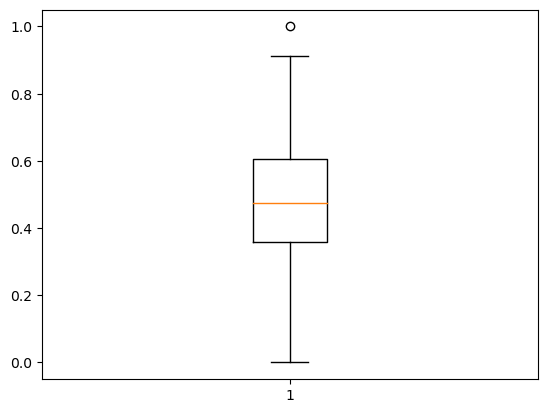

In [111]:
plt.boxplot(x_values)
 
# show plot
plt.show()

In [112]:
new_value = {'Lyrics': full_dataframe['Lyrics'], 'Score': x_values}
combined_dataframes = pd.DataFrame(data=new_value)
combined_dataframes.head()

,Lyrics,Score
0,She said I was seven and you were nine I looke...,0.239158
1,Why would you wanna break A perfectly good hea...,0.426517
2,He said the way my blue eyes shined Put those ...,0.400266
3,You have a way of coming easily to me And when...,0.388893
4,I didn't know what I would find When I went lo...,0.622384


In [113]:
retained_sample = combined_dataframes.sample(frac = 1, replace = False, random_state = 40)
print(retained_sample.describe())

            Score
count  133.000000
mean     0.473292
std      0.175753
min      0.000000
25%      0.359800
50%      0.474017
75%      0.604922
max      1.000000


Created scores from 0 to 1 and made sure that no variable would be skewing the measurement, which is why each measurement was given a score between 0 and 1.

In [114]:
mean_val = retained_sample['Score'].mean()
retained_sample['score_label'] =retained_sample['Score'].apply(lambda x: 1 if x > mean_val else 0)
print("Length of the vector:", len(retained_sample['score_label']))

print("Fraction of albums in the dataset that scored above the mean:", retained_sample['score_label'].mean())

Length of the vector: 133
Fraction of albums in the dataset that scored above the mean: 0.5037593984962406


In [130]:
vectorizer = TfidfVectorizer(min_df = 0.01, max_df = 0.9, use_idf = True)
resulting_review_texts = vectorizer.fit_transform(retained_sample['Lyrics'])
print("Feature matrix shape:", resulting_review_texts.shape)
standardized_data_review_texts = StandardScaler(with_mean = False, with_std = False).fit_transform(resulting_review_texts.toarray())
selector = SelectKBest(mutual_info_classif, k=30)
best_thirty_features_selected = selector.fit_transform(standardized_data_review_texts, y = retained_sample['score_label'])

Feature matrix shape: (133, 1461)


In [131]:
clf = LogisticRegression()
performance_topics = cross_val_score(clf, best_thirty_features_selected, retained_sample['score_label'], cv = 10, scoring='accuracy')
print(f"Model performance using topics as features: {np.mean(performance_topics):5.3f}")

Model performance using topics as features: 0.565


Testing intially with the default Logistic Regression and looking at the accuracy we see the model is doing a bit better than random at around 0.565. When we utilize the best 300 features the model performs at an astounding 0.7 which lowers interpretability and we thought against using that as the dataset is so small.

In [132]:
nlp_lg = spacy.load('en_core_web_sm')
# code here
def get_doc_embedding(text_string, spacy_nlp = spacy.load('en_core_web_sm')):
    
    text_string_nlped = spacy_nlp(text_string)
    
    tokenize_values = []
    
    for token in text_string_nlped:
        if not token.is_punct and not token.is_space and not token.is_stop and token.has_vector:
            tokenize_values.append(token.vector)
    #standardized_data_review_texts = StandardScaler().fit_transform(np.array(tokenize_values))
    return sum(tokenize_values)/len(tokenize_values) #word embedding vector - average of vectors of non-stopword tokens in input text


In [133]:
values_passed_in_new = []
for item in retained_sample['Lyrics']:
    values_passed_in_new.append(get_doc_embedding(text_string = item, spacy_nlp = nlp_lg))
values_passed_in_new = np.array(values_passed_in_new)
print("Shape of feature matrix:", values_passed_in_new.shape)

Shape of feature matrix: (133, 96)


Utilized a Logistic Regression with a max_iteration limit of 500 for binary classification. And for better accuracy I utilized a cross validation of 10 and took the mean of the performance of the model. Because of the small dataset I used all the data as the training data and thus the results and reproducible.

In [134]:
clf = LogisticRegression(max_iter = 500)
performance_topics = cross_val_score(clf, values_passed_in_new, retained_sample['score_label'], cv = 10)
print(f"Model performance using topics as features: {np.mean(performance_topics):5.3f}")

Model performance using topics as features: 0.555


The results use document embeddings from spaCy tokens and running on LogisticRegression. it showcases moderate power for predicting sentiment labels as it has 0.555 model performance.

In [135]:
resulting_review_texts = vectorizer.fit_transform(retained_sample['Lyrics'])
standardized_data_review_texts = StandardScaler(with_mean = False, with_std = False).fit_transform(resulting_review_texts.toarray())

params = {
    'C': [0.1, 1, 10, 50, 100, 1000],
    'max_iter': [500, 1000], # not part of the search, but set a classifier parameter
    'degree': [1, 2],
    'gamma': ['scale', 'auto']
}
svc = svm.SVC()

gs_cv = GridSearchCV(svc, param_grid = params, cv = 10)

gs_cv.fit(standardized_data_review_texts, retained_sample['score_label'])
print(gs_cv.best_params_)
print(gs_cv.best_score_)    

{'C': 10, 'degree': 1, 'gamma': 'scale', 'max_iter': 500}
0.5538461538461539


Using Support Vector Classifier which is a supervised learning technique for classification–I wanted to compare it to the results of Logistic Regression, which in this case ultimately seemed to produce a better model–finds optimal hyperplanes through different classes of data point in high-dimensional space. I thought it would do extremely well here as it is good at performing on small datasets and will not suffer from the curse of dimensionality bbecause of the limited dimensions in this dataset. It is also really good at handling outliers and noise in the data and effective for binary classification tasks like this one.

Evaluating utilizing Grid Search I tried various different combinations of parameters from changing the regularization parameter that controls the trade-off between model complexity and error with a range of values including 0.1, 1, 10, 50, 100, and 1000 to changing the max_iter, the maximum number of iterations for the SVM solver trying values like 500 and 1000, I also changed the degree of the polynomial kernel to test 1 and 2, and finall changing gamma to see if changing the default could potetnially produce better results. In the end the best parameter combbination created a scorre of 0.5538 which is the cross-validation core after 10 cross validations.